<a href="https://colab.research.google.com/github/merrymira/UPASS_ML_WEEK3/blob/main/UPASS_ML_WEEK9_FeatureReduction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Problem

# 1. Load and Explore Dataset

Import the pandas, numpy and altair packages

In [ ]:
# Solution
import pandas as pd
import numpy as np
import altair as alt

Mounting the drive
In this notebook

Read data from CSV file.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK3/refs/heads/main/data_practice_week9_house_data.csv')

# 2. Data information

In [ ]:
data.shape

(21613, 21)

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# 3. Data cleaning

##Drop duplicated records
Found duplicated data 1702 records

In [ ]:
# Check for duplicated values and display the count
duplicate_count = data.duplicated().sum()

# Print the number of duplicated values
print("Number of duplicated values in Data set:", duplicate_count)

Number of duplicated values in Data set: 0


In [ ]:
num_records = data.shape[0]
print(f"Number of Records before drop duplicated : {num_records}")

data = data.drop_duplicates()
num_records = data.shape[0]
print(f"Number of Records after drop duplicated : {num_records}")

Number of Records before drop duplicated : 21613
Number of Records after drop duplicated : 21613


###Check Null value in columns
Found Null value in columns

In [ ]:
# Check for null values in all columns
null_columns = data.columns[data.isnull().any()]
null_count = data[null_columns].isnull().sum()

if null_count.empty:
    print("No null values found in any column.")
else:
    print("Columns with null values in data set:")
    print(null_count)

No null values found in any column.


# 4. Feature Reduction

##(1) Principal Component Analysis (PCA)

Explained Variance Ratio per Component:
 [2.98706050e-01 1.27107770e-01 9.71101675e-02 7.25173664e-02
 6.35052253e-02 5.29717864e-02 4.93086988e-02 4.40343935e-02
 3.47733504e-02 3.16396863e-02 2.69960697e-02 2.21205301e-02
 1.74759120e-02 1.54851902e-02 1.39287694e-02 1.24869134e-02
 1.02221929e-02 9.60992764e-03 1.21882645e-17]


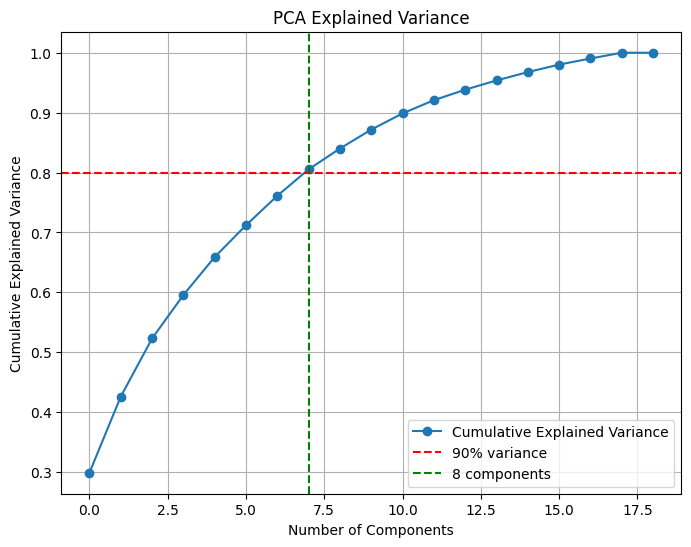

Cumulative Variance: [0.29870605 0.42581382 0.52292399 0.59544135 0.65894658 0.71191837
 0.76122706 0.80526146 0.84003481 0.87167449 0.89867056 0.92079109
 0.93826701 0.9537522  0.96768097 0.98016788 0.99039007 1.
 1.        ]
Number of Components (90% variance) =  8
Original Data Shape =  (21613, 21)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Split the data into features and target variable
X = data.drop(['id','date'], axis=1)
y = data['price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio
print("Explained Variance Ratio per Component:\n", pca.explained_variance_ratio_)

# Calculate the cumulative sum of the explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of principal components that explain at least 90% of the total variance
# n_components = np.where(cumulative_var_ratio >= 0.90)[0][0] + 1

# Changed the threshold to 0.80 since 0.90 wasn't reached
n_components = np.argmax(cumulative_var_ratio >= 0.80) + 1
# If none of the components reach 0.8, set n_components to the total number of components
n_components = n_components if n_components > 0 else pca.n_components_

# Select the first n_components principal components from the transformed data
X_pca_selected = X_pca[:, :n_components]

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(cumulative_var_ratio, marker='o', label="Cumulative Explained Variance")
plt.axhline(y=0.80, color='r', linestyle='--', label='90% variance')  # Adjust this line to 90% if needed
plt.axvline(x=n_components-1, color='g', linestyle='--', label=f'{n_components} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Cumulative variance
print("Cumulative Variance:", cumulative_var_ratio)
print('Number of Components (90% variance) = ', n_components)
print('Original Data Shape = ', data.shape)


**Number of Components (90% variance) = 12**: This means that, after performing PCA, you need 12 principal components to explain at least 90% of the variance in the original data.

**Original Data Shape = (21613, 21)**: This means your original dataset has 21613 samples (rows) and 21 features (columns).


**Interpretation:**

PCA reduces the dimensionality of the data by transforming the original features into new "principal components," which are linear combinations of the original features. These components are ordered by the amount of variance they explain, with the first few components capturing most of the variance in the data.

##(1.1) PCA: Find Top 10 Contributing Features for each component:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only the numerical features for PCA
numerical_features = data.select_dtypes(include=[np.number])

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features)

# Fit PCA
pca = PCA(n_components=12)  # Set number of components to 12 (the ones explaining 90% variance)
pca.fit(data_scaled)

# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame to hold the loadings for each component
loadings_df = pd.DataFrame(pca_components.T, index=numerical_features.columns, columns=[f'PC{i+1}' for i in range(12)])

# Find the top contributing features for each principal component
top_contributing_features = {}

# For each principal component, find the top features based on absolute loadings
for i in range(12):
    component = f'PC{i+1}'
    top_features = loadings_df[component].abs().sort_values(ascending=False).head(10)  # Get top 10 features for each component
    top_contributing_features[component] = top_features.index.tolist()

# Display the top contributing features for each component
for pc, features in top_contributing_features.items():
    print(f"Top features contributing to {pc}: {features}")


Top features contributing to PC1: ['sqft_living', 'sqft_above', 'grade', 'bathrooms', 'sqft_living15', 'price', 'bedrooms', 'floors', 'yr_built', 'long']
Top features contributing to PC2: ['sqft_basement', 'long', 'yr_built', 'zipcode', 'view', 'price', 'lat', 'condition', 'waterfront', 'yr_renovated']
Top features contributing to PC3: ['sqft_lot15', 'sqft_lot', 'floors', 'condition', 'yr_built', 'id', 'long', 'sqft_basement', 'lat', 'zipcode']
Top features contributing to PC4: ['condition', 'bedrooms', 'sqft_basement', 'zipcode', 'floors', 'waterfront', 'sqft_lot', 'sqft_lot15', 'yr_renovated', 'lat']
Top features contributing to PC5: ['waterfront', 'view', 'lat', 'id', 'zipcode', 'sqft_lot', 'sqft_lot15', 'long', 'bedrooms', 'yr_built']
Top features contributing to PC6: ['yr_renovated', 'lat', 'condition', 'bedrooms', 'yr_built', 'view', 'waterfront', 'price', 'zipcode', 'grade']
Top features contributing to PC7: ['id', 'lat', 'long', 'bedrooms', 'yr_built', 'yr_renovated', 'price', 

**Identify the most important features contributing to the first 117 principal components:**


1.   **PCA Loadings (Components Weights):** PCA generates "loadings" that show how much each original feature contributes to each principal component. These loadings are coefficients that map original features to the new principal components.
2.   **Identify the Top Features Based on Loadings:** For each of the 117 principal components, you can rank the original features by their absolute loading values. Features with higher absolute values of loadings contribute more to the component.

##(1.2) PCA Find Unique Features Across All Principal Components:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only the numerical features for PCA
numerical_features = data.select_dtypes(include=[np.number])

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_features)

# Fit PCA
pca = PCA(n_components=12)  # Set number of components to 12 (the ones explaining 90% variance)
pca.fit(data_scaled)

# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame to hold the loadings for each component
loadings_df = pd.DataFrame(pca_components.T, index=numerical_features.columns, columns=[f'PC{i+1}' for i in range(12)])

# Find the top contributing features for each principal component
distinct_features = set()  # Use a set to keep track of distinct features

# For each principal component, find the top features based on absolute loadings
for i in range(12):
    component = f'PC{i+1}'
    top_features = loadings_df[component].abs().sort_values(ascending=False).head(10).index.tolist()  # Get top 10 features for each component
    distinct_features.update(top_features)  # Add features to the set

# Convert the set of distinct features to a list for easier manipulation
pca_distinct_features = list(distinct_features)

# Print distinct features
print(f"Total number of distinct features: {len(pca_distinct_features)}")
print("Distinct features contributing to the PCs:")
for feature in pca_distinct_features:
    print(feature)


Total number of distinct features: 20
Distinct features contributing to the PCs:
sqft_living
sqft_lot
sqft_basement
sqft_above
view
waterfront
sqft_lot15
sqft_living15
long
zipcode
yr_renovated
id
bathrooms
grade
price
condition
yr_built
lat
floors
bedrooms


**Total number of distinct features from 12 components: 20**

To identify distinct features contributing to each principal component (PC).


1.   Get distinct features across all principal components.
2.   Avoid duplication: Ensure features contributing to multiple PCs are only listed once.





##(2) Sensitivity Analysis - Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = data.drop(['id','date'], axis=1)
y = data['price']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Calculate mutual information scores
mi_scores = mutual_info_classif(X_train_scaled, y_train)
mi_indices = np.argsort(mi_scores)[::-1]
mi_top_features = X_train.columns[mi_indices[:20]]
print("Top features based on Mutual Information:", mi_top_features)
print("Number of Top features based on Mutual Information:", len(mi_top_features))


Top features based on Mutual Information: Index(['price', 'waterfront', 'yr_renovated', 'view', 'grade', 'floors',
       'sqft_basement', 'condition', 'bedrooms', 'lat', 'sqft_living',
       'bathrooms', 'sqft_living15', 'sqft_above', 'zipcode', 'sqft_lot15',
       'sqft_lot', 'long', 'yr_built'],
      dtype='object')
Number of Top features based on Mutual Information: 19


In [ ]:
# prompt: mi_top_features drop column 'price'

mi_top_features = mi_top_features.drop('price', errors='ignore')
print("Top features based on Mutual Information (without price):", mi_top_features)
print("Number of Top features based on Mutual Information (without price):", len(mi_top_features))


Top features based on Mutual Information (without price): Index(['waterfront', 'yr_renovated', 'view', 'grade', 'floors',
       'sqft_basement', 'condition', 'bedrooms', 'lat', 'sqft_living',
       'bathrooms', 'sqft_living15', 'sqft_above', 'zipcode', 'sqft_lot15',
       'sqft_lot', 'long', 'yr_built'],
      dtype='object')
Number of Top features based on Mutual Information (without price): 18


##(3) Compare the predition performance of a training model on feature sets from PCA and Mutual Information

In [ ]:
# prompt: use regression model and compare the training model on 20 features from the above PCA and compare with 19 features from mutual_info_classif

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features and target variable
X = data.drop(['id','date'], axis=1)
y = data['price']

# Select features from PCA
X_pca = data[pca_distinct_features]

# Splitting data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Select features from Mutual Information
X_mi = data[mi_top_features]

# Splitting data into training and testing sets
X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split(X_mi, y, test_size=0.3, random_state=42)

# Train and evaluate Linear Regression model with PCA features
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

# Train and evaluate Linear Regression model with Mutual Information features
model_mi = LinearRegression()
model_mi.fit(X_train_mi, y_train)
y_pred_mi = model_mi.predict(X_test_mi)

mse_mi = mean_squared_error(y_test, y_pred_mi)
r2_mi = r2_score(y_test, y_pred_mi)

print("Linear Regression with PCA Features:")
print("MSE:", mse_pca)
print("R-squared:", r2_pca)

print("\nLinear Regression with Mutual Information Features:")
print("MSE:", mse_mi)
print("R-squared:", r2_mi)


Linear Regression with PCA Features:
MSE: 1.7118937747439226e-16
R-squared: 1.0

Linear Regression with Mutual Information Features:
MSE: 43387526779.35536
R-squared: 0.699462705796988
